In [1]:
import cv2
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
import cStringIO as StringIO
import requests
import PIL.Image as Image
from PIL import ImageDraw, ImageFont

In [3]:
filename='/disk2/mirvideo/Demo M_Demo M_AVCI_TEST.mxf'
cap=cv2.VideoCapture(filename)
while not cap.isOpened():
    cap=cv2.VideoCapture(filename)
    cv2.waitKey(1000)
    print "Wait for the header"
pos_frame = cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES)
flag, frame = cap.read()

In [4]:
import sys
sys.path.insert(0, '/home/deep/code/localization/')
sys.path.insert(0, '/home/deep/code/localization/py-faster-rcnn/caffe-fast-rcnn/python/')
sys.path.insert(0, '/home/deep/code/localization/py-faster-rcnn/lib/')
import Localiser as l
import exifutil
loc = l.ImageLocalization(model='/home/deep/code/localization/vgg16_rpn_coco.prototxt',\
                          pretrained='/home/deep/code/localization/vgg16_fast_rcnn_iter_280000.caffemodel',gpu=True)

In [83]:
res=tuple(map(int,(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH),cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))))
fps=int(cap.get(cv2.cv.CV_CAP_PROP_FPS))
fourcc = cv2.cv.CV_FOURCC('m', 'p', '4', 'v')
vout = cv2.VideoWriter()
vout.open('locPIL.mov',fourcc,fps,res,True)

True

In [87]:
while True:
    flag, frame = cap.read()
    if flag:
        pos_frame = cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES)
        result=loc.get_bboxes(frame)
        exifutil.remove_empty_keys(result)
        z = lambda x: (x[0].astype(np.uint16).tolist(), x[1])
        im=Image.fromarray(frame[:, :, (2, 1, 0)])
        dr=ImageDraw.Draw(im)
        font = ImageFont.truetype('/usr/share/fonts/truetype/freefont/FreeSerif.ttf', 96)
        for k in result:
            result[k] = map(z, result[k])
        for k in result:
            for rect, prob in result[k]:
                dr.rectangle(rect, outline='red')
                dr.text(rect[:2] ,k+' '+'%.3f'%(prob), font=font, fill='yellow')
        frame=np.array(im)    
        vout.write(frame)
        if pos_frame%10==0:
            print pos_frame
    else:
        # The next frame is not ready, so we try to read it again
        cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES, pos_frame-1)
        print "frame is not ready"
        # It is better to wait for a while for the next frame to be ready
        cv2.waitKey(1000)

    if cv2.waitKey(10) == 27:
        break
    if cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES) == 6500: #cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT):
        # If the number of captured frames is equal to the total number of frames,
        # we stop
        break

6040.0
6050.0
6060.0
6070.0
6080.0
6090.0
6100.0
6110.0
6120.0
6130.0
6140.0
6150.0
6160.0
6170.0
6180.0
6190.0
6200.0
6210.0
6220.0
6230.0
6240.0
6250.0
6260.0
6270.0
6280.0
6290.0
6300.0
6310.0
6320.0
6330.0
6340.0
6350.0
6360.0
6370.0
6380.0
6390.0
6400.0
6410.0
6420.0
6430.0
6440.0
6450.0
6460.0
6470.0
6480.0
6490.0
6500.0


In [88]:
vout.release() 
vout=None

# Проработка наложения прямоугольников на изображение

In [49]:
while True:
    flag, frame = cap.read()
    if flag:
        pos_frame = cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES)
        if pos_frame%10==0:
            print pos_frame
    else:
        # The next frame is not ready, so we try to read it again
        cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES, pos_frame-1)
        print "frame is not ready"
        # It is better to wait for a while for the next frame to be ready
        cv2.waitKey(1000)

    if cv2.waitKey(10) == 27:
        break
    if cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES) == 5800: #cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT):
        # If the number of captured frames is equal to the total number of frames,
        # we stop
        break

5610.0
5620.0
5630.0
5640.0
5650.0
5660.0
5670.0
5680.0
5690.0
5700.0
5710.0
5720.0
5730.0
5740.0
5750.0
5760.0
5770.0
5780.0
5790.0
5800.0


In [50]:
result=loc.get_bboxes(frame)
exifutil.remove_empty_keys(result)
z = lambda x: (x[0].astype(np.uint16).tolist(), x[1])
for k in result:
    result[k] = map(z, result[k])
#    for k in result:
#        for rect, prob in result[k]:
#            #cv2.rectangle(frame, (rect[0], rect[1]), (rect[2]-rect[0], rect[3]-rect[1]), (0,255,0), 5)
#            cv2.rectangle(frame, (rect[0], rect[1]), (rect[2]-rect[0], rect[3]-rect[1]), (0,255,255), 5)
#           font = cv2.FONT_HERSHEY_SIMPLEX
#            cv2.putText(frame,k+' '+str(round(prob,3)),(rect[0], rect[1]), font, 4,(255,255,255),2)

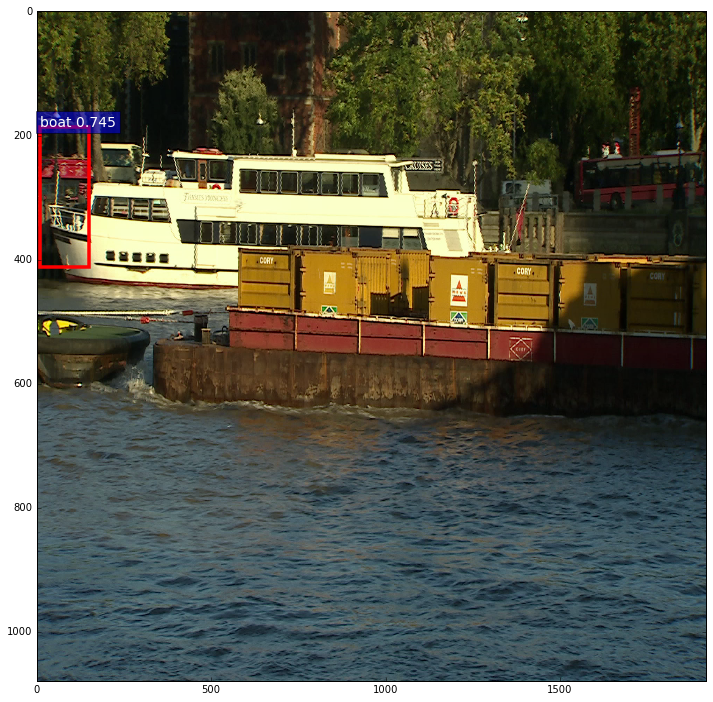

In [48]:
#result['boat']=map(z,result['boat'])
bbox=result['boat'][2][0]
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(frame[:, :, (2, 1, 0)], aspect='auto')
ax.add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='red', linewidth=3.5)
            )

ax.text(bbox[0], bbox[1] - 2,
                '{:s} {:.3f}'.format('boat', result['boat'][0][1]),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')

fig.canvas.draw()

In [81]:
pos_frame

5802.0

FreeMono.ttf		 FreeSans.ttf		  FreeSerif.ttf
FreeMonoBold.ttf	 FreeSansBold.ttf	  FreeSerifBold.ttf
FreeMonoBoldOblique.ttf  FreeSansBoldOblique.ttf  FreeSerifBoldItalic.ttf
FreeMonoOblique.ttf	 FreeSansOblique.ttf	  FreeSerifItalic.ttf


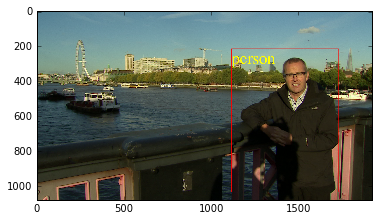

In [78]:

plt.imshow(np.array(im))


In [70]:
#rect=bbox
#frame=frame[:, :, (2, 1, 0)]
#cv2.rectangle(frame, (rect[0], rect[1]), (rect[2]-rect[0], rect[3]-rect[1]), (255,0,0), 5)

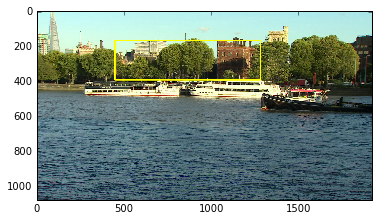

In [36]:
plt.imshow(frame)